Всем привет! Пришло время нашей первой домашней работы не на степике. Надеюсь, будет весело :)

Так как, `pandas` вы еще не проходили, то я вам немного помогу. Эту домашку можно делать как в питоне, так и в R, само задание будет написано в `Google Colaboratory`.

In [72]:
# Pandas понадобится нам для чтения денных
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [10]:
# В переменную data_path надо положить путь до данных
data_path = "/Users/alastrine/Downloads/Stat"
expression_data = pd.read_csv(f"{data_path}/homework_lecture_5_data.csv", index_col=0)
expression_data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [14]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'")
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'")

В этом задании мы будем работать с данными об экспрессии генов в друх клеточных типах: в B-клетках и в NK-клетках. Выясним, средняя экспрессия каких генов значимо различается в этих клеточных типах.

Я буду показывать примеры на одном гене, а на основе них вы сможете сделать похожие задачи для всех генов.

In [15]:
example_gene = "TMCC1"

## Задание 1

**2 баллов**

Посмотрим на распределение экспрессий гена `TMCC1` в обоих клеточных типах.

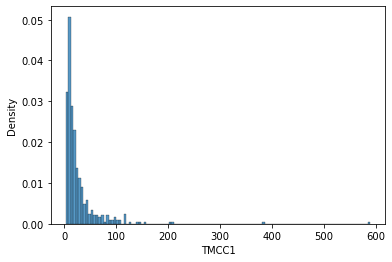

In [16]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");

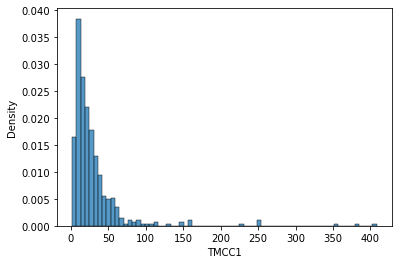

In [17]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");

Кажется, что они немного различаются. Для начала давайте попробуем еще раз проверить центральную предельную теорему.

**Задание:**

Напишите функцию, которая будет принимать на вход экспрессии гена, семплировать их них выборки размера `sample_size`, считать среднюю экспрессию и повторять это `n_samples` раз. Примените эту функцию к экспрессиям гена `TMCC1` в обоих клеточных типах, визуализируйте их. Отличаются ли средние экспрессии данного гена у этих клеточных типов?
 
Сигнатура функции:

```python
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []

    return mean_expressions
```

In [63]:
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []
    for i in range(n_samples):
        mex = expressions.sample(n=sample_size).mean()
        mean_expressions.append(mex)
    return mean_expressions

ms_nk = demonstrate_clt(nk_cells_expression_data[example_gene], 100, 2000)
ms_b = demonstrate_clt(b_cells_expression_data[example_gene], 100, 2000)

<AxesSubplot:ylabel='Density'>

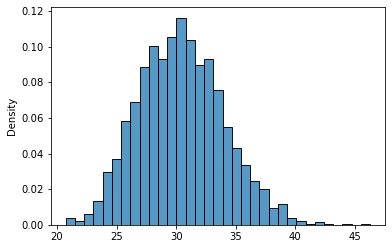

In [64]:
sns.histplot(ms_nk, stat="density")

<AxesSubplot:ylabel='Density'>

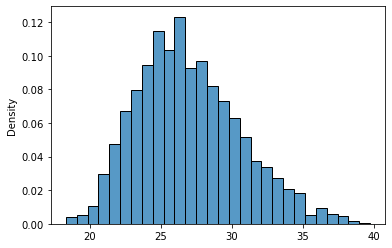

In [65]:
sns.histplot(ms_b, stat="density")

In [82]:
mean_nk = np.mean(ms_nk)
mean_nk

30.398453682817998

In [84]:
mean_b = np.mean(ms_b)
mean_b

26.9772537787865

In [85]:
scipy.stats.ttest_ind(ms_nk, ms_b)

Ttest_indResult(statistic=30.078133215572908, pvalue=2.3553654548276296e-179)

Следние экспрессии отличаются между клеточными типами.

А теперь посчитайте 95% доверительные интервалы для обоих распределений (примем тот факт, что средние распределены нормально для обоих клеточных типов) и скажите, отличается ли средняя экспрессия данного гена между клеточными типами?

In [103]:
sd_b = np.std(b_cells_expression_data[example_gene])
sd_nk = np.std(nk_cells_expression_data[example_gene])

scipy.stats.norm.interval(0.95, loc=mean_b, scale=sd_b/np.sqrt(2000))

(25.20399559539464, 28.75051196217836)

In [152]:
scipy.stats.norm.interval(0.95, loc=mean_nk, scale=sd_nk/np.sqrt(2000))

(28.611983309818193, 32.1849240558178)

Следние экспрессии отличаются между клеточными типами.

## Задание 2

**4 баллов**

Вспомнили центральную предельную теорему и то, как считать доверительные интервалы в простом случае, теперь давайте воспользуемся библиотечной реализацией для того, чтобы протестировать уже все гены. 

In [105]:
import scipy.stats as st

Посчитаем доверительные интервалы для нашего демонстрационного гена в обоих клеточных типах:

In [110]:
# B клетки
ci_b = st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего
ci_b

(23.420272072079285, 30.5376715863207)

In [111]:
# NK клетки
ci_nk = st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего
ci_nk

(26.846104688075624, 34.016534512724384)

Напишите функцию для проверки того, что доверительные интервалы пересекаются. На лекции мы тестировали гипотезы для равенства среднего выборки заданному числу и проверяли, попало ли оно в границы этого интервала или нет, если оно оказывалось за ними, то мы говорили, что средние отличаются. Здесь же мы имеем дело с двумя выборками, поэтому будем проверять, пересекаются ли доверительные интервалы, и, если нет, то говорить о том, что средние в выборках отличаются.

```python
def check_intervals_intersect(first_ci, second_ci):   

    return are_intersect # True or False
```

In [119]:
def c(first_ci, second_ci):   

    if second_ci[0] > first_ci[1] or first_ci[0] > second_ci[1]:
        are_intersect = False
    else:
        are_intersect = True
    
    return are_intersect # True or False


Теперь для каждого гена посчитайте доверительные интервалы в обоих клеточных типах, и проверьте, пересекаются ли они? Результаты можно добавлять в список, например:

```python
ci_test_results = [True, False, ..., True]
```

In [143]:
ci_test_results = []

for col in list(expression_data.columns)[0:-1]:
    
    ci_b = st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data[col]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data[col]), # Среднее
              scale=st.sem(b_cells_expression_data[col])) # Стандартная ошибка среднего
    
    ci_nk = st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[col]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[col]), # Среднее
              scale=st.sem(nk_cells_expression_data[col])) # Стандартная ошибка среднего
    
    ci_test_result = check_intervals_intersect(ci_b, ci_nk)
    
    ci_test_results.append(ci_test_result)
    

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression

    return ci_test_results
```

In [144]:
def check_dge_with_ci(first_table, second_table):
    
    ci_test_results = []
    
    for col in list(first_table.columns)[0:-1]:
    
        ci_b = st.t.interval(alpha=0.95, # 95% доверительный интервал
                  df=len(first_table[col]) - 1, # число степеней свободы - 1
                  loc=np.mean(first_table[col]), # Среднее
                  scale=st.sem(first_table[col])) # Стандартная ошибка среднего
    
        ci_nk = st.t.interval(alpha=0.95, # 95% доверительный интервал
                  df=len(second_table[col]) - 1, # число степеней свободы - 1
                  loc=np.mean(second_table[col]), # Среднее
                  scale=st.sem(second_table[col])) # Стандартная ошибка среднего
    
        ci_test_result = check_intervals_intersect(ci_b, ci_nk)
    
        ci_test_results.append(ci_test_result)

    return ci_test_results

check_dge_with_ci(b_cells_expression_data, nk_cells_expression_data)

[True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True

## Задание 3

**4 баллов**

Давайте теперь применим для той же задачи `z-критерий`. Будем считать, что в данном случае $\alpha$ = 0.05, и если полученное `p-value` будет меньше, то экспрессия генов значимо отличается.

In [147]:
from statsmodels.stats.weightstats import ztest

In [ ]:
# Наш излюбленный ген
ztest(
    b_cells_expression_data[example_gene],
    nk_cells_expression_data[example_gene]
)

(-1.3427434041885127, 0.17935507499860204)

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39.091270,21.292559,0.000000,5.111145,4.291092,51.991970,29.190918,0.000000,0.586704,49.823112,...,15.923135,4.375880,0.000000,15.084838,0.000000,17.283436,2.314632,15.504042,54.509686,B_cell
496,24.494837,53.397003,0.004436,0.000000,1.869485,92.877580,17.648138,0.000000,0.486630,23.275782,...,0.000000,118.967490,0.000000,36.090360,0.000000,59.025913,5.747504,10.299628,28.361814,B_cell
497,6.031427,53.015590,0.041065,0.339375,2.213989,106.173010,35.705780,0.004937,0.399671,15.344549,...,10.069483,29.270880,0.000000,21.336897,0.000000,53.501370,3.841926,21.170044,34.345673,B_cell
498,16.592407,58.197968,5.531140,9.906462,6.571997,75.928470,30.512959,0.000000,6.738329,19.562070,...,2.457385,18.326260,0.078343,26.984943,0.552479,48.684544,9.085583,23.428875,273.135700,B_cell


Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression

    return z_test_results
```

In [151]:
def check_dge_with_ztest(first_table, second_table):
    
    z_test_results = []
    
    for col in list(first_table.columns)[0:-1]:
        
        dge = ztest(first_table[col], second_table[col])
        
        if dge[1] < 0.05:
            z_test_results.append(False)
        else: 
            z_test_results.append(True)
            
    return z_test_results

check_dge_with_ztest(b_cells_expression_data, nk_cells_expression_data)

[True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 Fals

## Задание 4

**10 баллов**

Теперь пришла пора оформить все ваши старания в виде программы. Напишите программу, которая принимает на вход следующие аргуметры:

1. `first_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для одного клеточного типа;
2. `second_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для второго клеточного типа;
3. `save_results_table` &ndash; название таблицы с результатами.

Считывать аргументы можно любым удобным способом (например, `input`, `argparse`).

Как читать данные при помощи пандаса мы уже знаем, осталось понять, как записывать результаты. Допустим, вы записывали результаты ваших тестов в списки, тогда создать пандасовский датафрейм можно следующим образом:

In [ ]:
ci_test_results = [True, False, True]
z_test_results = [True, True, True]
# Опционально можно также сохранять p-value для z-критерия
z_test_p_values = [0.004, 0.01, 0.0001]
# Также сохраните разницу в средних экспрессиях между 1 и 2 таблицами для каждого гена,
# чтобы было понять, уменьшается или увеличивается экспрессия гена
mean_diff = [-10, 10, 0.5]

# Созданим словарь {'название колонки': список_значений}
results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
results.head()

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,True,True,0.0040,-10.0
1,False,True,0.0100,10.0
2,True,True,0.0001,0.5


In [ ]:
# Сохраним таблицу в .csv файл
results.to_csv("path_to_your_awesome_results.csv")

In [ ]:
# В этом коде мы считаем, что в последний столбец все же записан клеточный тип

first_cell_type_expressions_path = input('путь до таблицы с экспрессиями генов для первого клеточного типа:')
second_cell_type_expressions_path = input('путь до таблицы с экспрессиями генов для второго клеточного типа:')
save_results_table = input('Имя таблицы с результатами:')

first_cell_type_expressions = pd.read_csv(first_cell_type_expressions_path)
second_cell_type_expressions = pd.read_csv(second_cell_type_expressions_path)


def check_dge_with_ci(first_table, second_table):
    
    ci_test_results = []
    
    for col in list(first_table.columns)[0:-1]:
    
        ci_b = st.t.interval(alpha=0.95, 
                  df=len(first_table[col]) - 1, 
                  loc=np.mean(first_table[col]), 
                  scale=st.sem(first_table[col])) 
    
        ci_nk = st.t.interval(alpha=0.95, 
                  df=len(second_table[col]) - 1, 
                  loc=np.mean(second_table[col]), 
                  scale=st.sem(second_table[col])) 
    
        ci_test_result = check_intervals_intersect(ci_b, ci_nk)
        ci_test_results.append(ci_test_result)

    return ci_test_results


def check_dge_with_ztest(first_table, second_table):
    
    z_test_results = []
    z_test_p_values = []
    
    for col in list(first_table.columns)[0:-1]:
        
        dge = ztest(first_table[col], second_table[col])
        z_test_p_values.append(dge[1])
        
        if dge[1] < 0.05:
            z_test_results.append(False)
        else: 
            z_test_results.append(True)
            
    return (z_test_results, z_test_p_values)


def mean_d(first_table, second_table):
    
    mean_diff = []
    
    for col in list(first_table.columns)[0:-1]:
        
        md = np.mean(second_table[col]) - np.mean(first_table[col])
        mean_diff.append(md)
    
    return(mean_diff)


ci_test_results = check_dge_with_ci(first_cell_type_expressions, second_cell_type_expressions)
z_test_results, z_test_p_values = check_dge_with_ztest(first_cell_type_expressions, second_cell_type_expressions)
mean_diff = mean_d(first_cell_type_expressions, second_cell_type_expressions)

results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

results = pd.DataFrame(results)

results.to_csv(f"{save_results_table}.csv")
    

In [168]:
# С тестовыми данными

first_cell_type_expressions = b_cells_expression_data
second_cell_type_expressions = nk_cells_expression_data


def check_dge_with_ci(first_table, second_table):
    
    ci_test_results = []
    
    for col in list(first_table.columns)[0:-1]:
    
        ci_b = st.t.interval(alpha=0.95, 
                  df=len(first_table[col]) - 1, 
                  loc=np.mean(first_table[col]), 
                  scale=st.sem(first_table[col])) 
    
        ci_nk = st.t.interval(alpha=0.95, 
                  df=len(second_table[col]) - 1, 
                  loc=np.mean(second_table[col]), 
                  scale=st.sem(second_table[col])) 
    
        ci_test_result = check_intervals_intersect(ci_b, ci_nk)
        ci_test_results.append(ci_test_result)

    return ci_test_results


def check_dge_with_ztest(first_table, second_table):
    
    z_test_results = []
    z_test_p_values = []
    
    for col in list(first_table.columns)[0:-1]:
        
        dge = ztest(first_table[col], second_table[col])
        z_test_p_values.append(dge[1])
        
        if dge[1] < 0.05:
            z_test_results.append(False)
        else: 
            z_test_results.append(True)
            
    return (z_test_results, z_test_p_values)


def mean_d(first_table, second_table):
    
    mean_diff = []
    
    for col in list(first_table.columns)[0:-1]:
        
        md = np.mean(second_table[col]) - np.mean(first_table[col])
        mean_diff.append(md)
    
    return(mean_diff)


ci_test_results = check_dge_with_ci(first_cell_type_expressions, second_cell_type_expressions)
z_test_results, z_test_p_values = check_dge_with_ztest(first_cell_type_expressions, second_cell_type_expressions)
mean_diff = mean_d(first_cell_type_expressions, second_cell_type_expressions)

results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

results = pd.DataFrame(results)

results.to_csv(f"{save_results_table}.csv")


In [169]:
results

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,True,True,0.179355,3.452348
1,False,False,0.000063,6.473981
2,True,True,0.704603,-0.763407
3,False,False,0.015754,3.334424
4,True,True,0.091768,-2.725465
...,...,...,...,...
18787,True,True,0.948941,-0.071215
18788,True,False,0.026036,-3.675664
18789,True,True,0.366890,-1.322516
18790,True,True,0.114598,2.393473


## Задание 5

**0.5 баллов (доп.)**

В онлайне сложно знакомиться, а особенно сейчас. Созвонитесь с кем-то из других студентов и прикрипите сюда скрин вашего созвона. Можно коротко описать, о чем вы говорили)

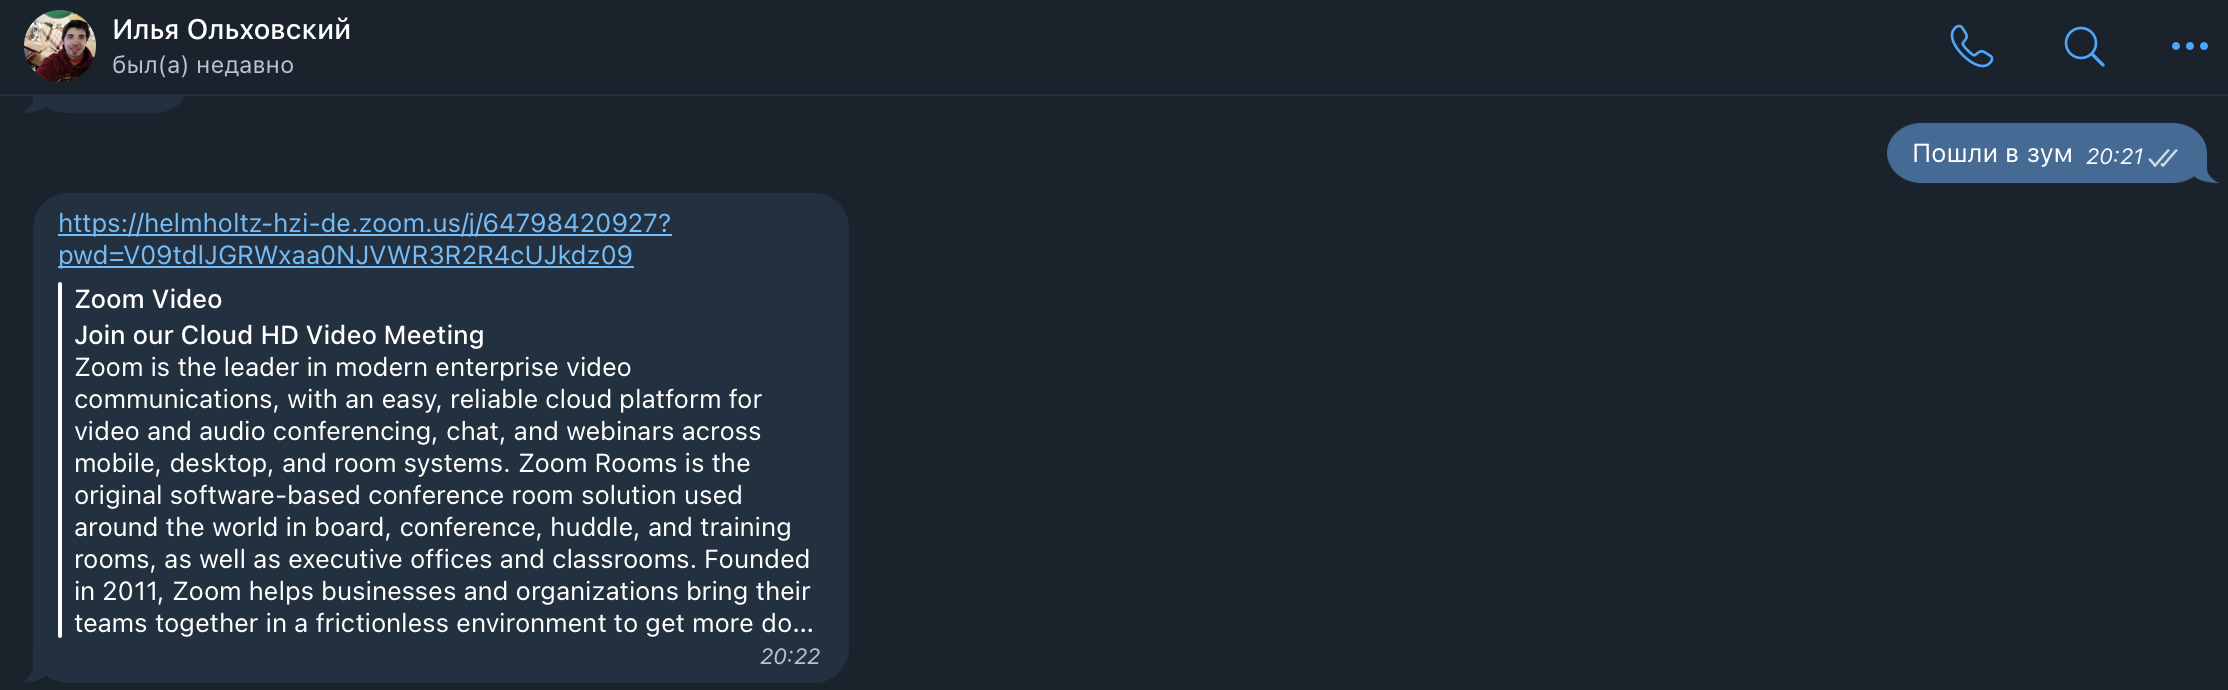